 ## Data Loading

In [ ]:
## Import the pandas library for data manipulation and analysis




In [ ]:
import pandas as pd


In [ ]:
# Load the dataset from a CSV file into a DataFrame



In [ ]:
retail_original= pd.read_csv("retail_store_sales.csv")

In [ ]:
## Create a working copy of the original dataset
# This prevents accidental changes to the original data



In [ ]:
df= retail_original.copy()

In [ ]:
## Check the first few rows of the dataset to understand its structure


In [ ]:
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


In [ ]:
# Check basic information about the dataset:
# - Number of rows and columns
# - Column names and their data types
# - Number of non-null (non-missing) values in each column



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
## Check the shape of the dataset: (number of rows, number of columns)



In [ ]:
df.shape

(12575, 11)

In [ ]:
## View the last few rows of the dataset
# Useful for checking if there are issues at the end of the file (e.g., bad formatting or missing values)



In [ ]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [ ]:
#Descriptive Statistics for Numerical Columns



In [ ]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [ ]:
# Check missing values

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
##Value Counts for the 'Item' Column

In [ ]:
df['Item'].value_counts()

,count
Item,
Item_2_BEV,126
Item_25_FUR,113
Item_11_FUR,110
Item_16_MILK,109
Item_1_MILK,109
...,...
Item_5_BEV,7
Item_13_BEV,7
Item_13_FUR,7


In [ ]:
# Title: Fill Missing 'Item' Values Based on Most Frequent Value per Category

In [ ]:
# Step 1: Identify the most frequent 'Item' for each 'Category' and store in a dictionary.
# This helps us find the most common item associated with each category.

# Step 2: Define a function that fills missing 'Item' values in each row.
# If the 'Item' is missing and the 'Category' is known, replace it with the most frequent item for that category.

# Step 3: Apply the function to the DataFrame to update the missing 'Item' values.

# Step 4: Finally, check how many missing values remain in the 'Item' column to confirm the filling process.


In [ ]:


# Step 1: Identify the most frequent Item for each Category
top_items = {}
for category in df['Category'].unique():
    items_in_category = df[df['Category'] == category]['Item']
    most_frequent = items_in_category.value_counts().idxmax()
    top_items[category] = most_frequent

# Step 2: Define a function to fill missing values in 'Item' based on 'Category'
def fill_item(row):
    if pd.isna(row['Item']) and row['Category'] in top_items:
        return top_items[row['Category']]
    return row['Item']

# Step 3: Apply the function to the dataframe
df['Item'] = df.apply(fill_item, axis=1)

# Step 4: Check how many missing values remain in 'Item'
print(df['Item'].isnull().sum())


0


In [ ]:
df['Item'].shape

(12575,)

Data Cleaning

```
# This is formatted as code
```



Handling Missing Values

In [ ]:
##Calculating and Imputing Missing 'Total Spent' Entries

In [ ]:

df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit'] * df['Quantity'])


In [ ]:
##Filling Missing 'Quantity' Values Using Total Spent ÷ Price Per Unit



In [ ]:
df ['Quantity']= df ['Quantity'].fillna(df['Total Spent'] / df[

'Price Per Unit'])


In [ ]:
### Identifying and Printing Rows with Missing Data in Key Transaction Columns

In [ ]:
missing = df[df[['Price Per Unit', 'Quantity', 'Total Spent']].isnull().any(axis=1)]
print(missing)


      Transaction ID Customer ID                       Category          Item  \
5        TXN_7482416     CUST_09                     Patisserie   Item_12_PAT   
7        TXN_1372952     CUST_21                      Furniture   Item_25_FUR   
11       TXN_5422631     CUST_09                  Milk Products  Item_16_MILK   
15       TXN_1809665     CUST_14                      Beverages    Item_2_BEV   
17       TXN_9634894     CUST_15                  Milk Products  Item_16_MILK   
...              ...         ...                            ...           ...   
12527    TXN_1069238     CUST_23                           Food  Item_14_FOOD   
12552    TXN_4823896     CUST_05                  Milk Products  Item_16_MILK   
12556    TXN_4397672     CUST_04                      Beverages    Item_2_BEV   
12562    TXN_7422454     CUST_07                       Butchers   Item_20_BUT   
12564    TXN_2153066     CUST_17  Electric household essentials    Item_8_EHE   

       Price Per Unit  Quan

In [ ]:


##After applying basic imputation techniques, I still had missing values in the `Quantity` and `Total Spent` columns.

##To address this:
##- I filled missing `Quantity` values using the **median**, which is more robust to outliers.
##- Then, I recalculated `Total Spent` for those rows by multiplying `Price Per Unit` by `Quantity`.

##This ensured consistency in the dataset before continuing to the analysis stage.


In [ ]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'])
df.isnull().sum()


,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,609
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
### Filling Missing 'Discount Applied' Values with 'unknown'

In [ ]:
df['Discount Applied']=df['Discount Applied'].fillna('unknown')

In [ ]:
### Summary of Missing Values per Column


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,609
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
##Price per Unit Calculation

In [ ]:

df['Price Per Unit'] = df['Total Spent'] / df['Quantity']


In [ ]:
##Missing Price Values Detection

In [ ]:
df['Price Per Unit'].isnull().sum()

np.int64(0)

In [ ]:
## Find how many duplicated rows exist

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check unique values in a categorical column to spot typos or inconsistencies

In [ ]:
df['Customer ID'].unique()


array(['CUST_09', 'CUST_22', 'CUST_02', 'CUST_06', 'CUST_05', 'CUST_07',
       'CUST_21', 'CUST_23', 'CUST_25', 'CUST_14', 'CUST_15', 'CUST_17',
       'CUST_01', 'CUST_10', 'CUST_04', 'CUST_13', 'CUST_18', 'CUST_08',
       'CUST_20', 'CUST_12', 'CUST_11', 'CUST_19', 'CUST_16', 'CUST_24',
       'CUST_03'], dtype=object)

In [ ]:
## Count of Unique Values per Column

In [ ]:
df.nunique()

,0
Transaction ID,12575
Customer ID,25
Category,8
Item,200
Price Per Unit,25
Quantity,10
Total Spent,227
Payment Method,3
Location,2
Transaction Date,1114


In [ ]:
### Convert column to datetime.

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [ ]:
df['Transaction Date'].dtype

dtype('<M8[ns]')

In [ ]:
df['Category'].value_counts()


,count
Category,
Electric household essentials,1591
Furniture,1591
Food,1588
Milk Products,1584
Butchers,1568
Beverages,1567
Computers and electric accessories,1558
Patisserie,1528


In [ ]:
##Saving the Cleaned Dataset

In [ ]:
df.to_csv('cleaned_data_retail.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_data_retail.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



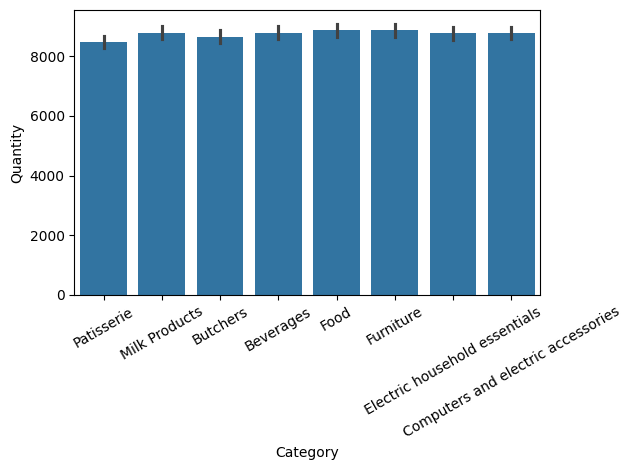

In [ ]:
sns.barplot(data=df, x="Category", y="Quantity", estimator=np.sum)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
## Exploratory Data Analysis of Sales Transactions by Category and Location

In [ ]:
pivot_table = df.pivot_table(
    values='Total Spent',
    index='Location',
    columns='Category',
    aggfunc='sum',
    fill_value=0
   )

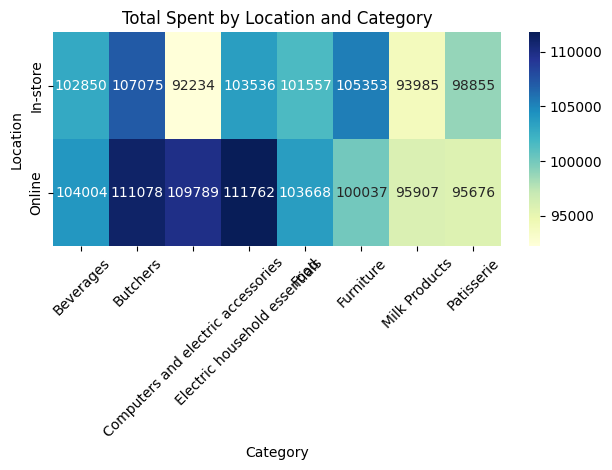

In [ ]:
sns.heatmap(data=pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Spent by Location and Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

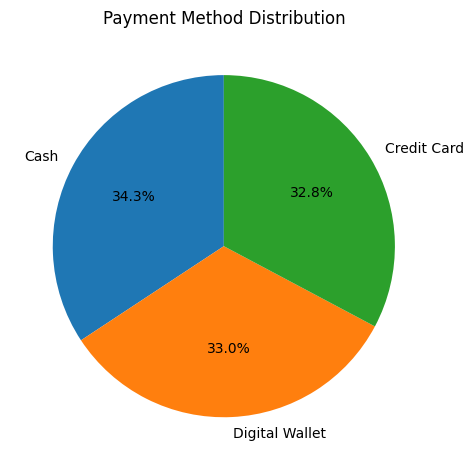

In [ ]:
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()


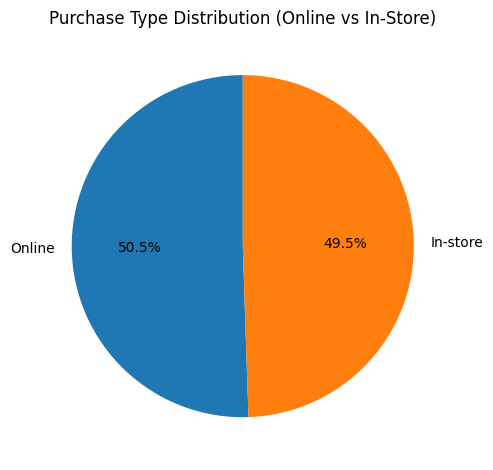

In [ ]:
df['Location'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Purchase Type Distribution (Online vs In-Store)")
plt.ylabel('')
plt.tight_layout()
plt.show()


<Axes: xlabel='Month'>

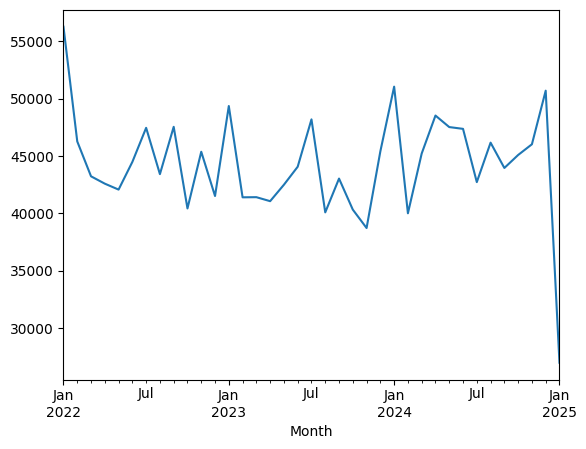

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.to_period('M')
df.groupby('Month')['Total Spent'].sum().plot(kind='line')
